## Coding activity 4: Leave one out cross validation

In [2]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def r(x):
    """A convenience function to compute values of r."""
    return 0.5*x*np.cos(4*np.pi*x)

def make_y(x):
    """A convenience function to sample from N(r(x), 0.1)."""
    return r(x) + 0.1*np.random.normal(size=len(x))

- For our running example, plot $\widehat R(k)$ versus $k$. Compute the $\hat R(k)$ using
`sklearn`'s `LeaveOneOut` class and the generator returned by its
`split` method. For details, see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html">the docs</a>.
    
- Which $k$ that minimizes $\widehat R(k)$? Compare with the results of coding activity 2.

- For this optimal value of $k$, plot $\widehat r_k^{(-i)}(x_i)$ versus $x_i$ and $r(x)$ versus $x$ on the same axes.


The k giving the smallest LOOCV score is k = 4.


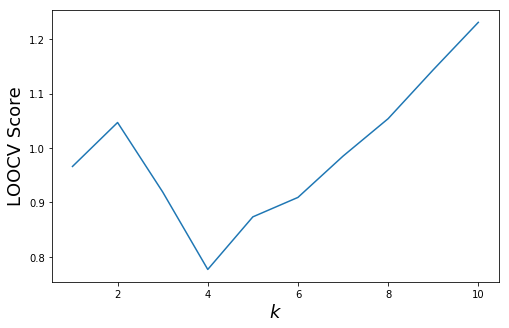

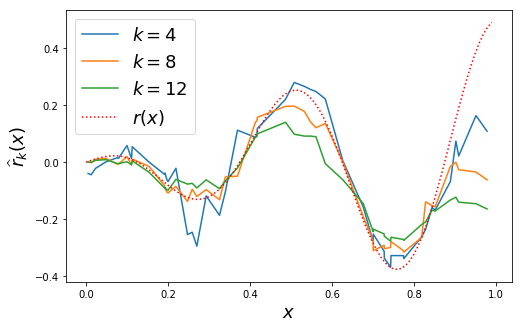

In [8]:
from sklearn.model_selection import LeaveOneOut

np.random.seed(666)
n = 50
X = np.sort(np.random.uniform(size=n))
y = make_y(X)

loo = LeaveOneOut()

scores = [] # Collect LOOCV scores here for k=1, ..., 10
ys_ = [] # Collect smoothers here for k=1, ..., 10

for k in range(1, 15):
    y_ = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        R = KNeighborsRegressor(n_neighbors=k)
        R.fit(X_train.reshape(-1, 1), y_train)
        y_.append(R.predict(X_test.reshape(-1, 1))[0])
    scores.append(np.dot(y_ - y, y_ - y))
    ys_.append(y_)

print(f"The k giving the smallest LOOCV score is k = {np.argmin(scores) + 1}.")

plt.figure(figsize=(8, 5))
plt.xlabel("$k$", fontsize=18)
plt.ylabel("LOOCV Score", fontsize=18)
plt.plot(range(1, 11), scores[:10])
plt.show()

plt.figure(figsize=(8, 5))
for k in [3, 7, 11]:
    plt.plot(X, ys_[k], label=f"$k={k+1}$")
x = np.arange(0, 1, 0.01)
plt.plot(x, r(x), 'r:', label="$r(x)$")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$\widehat r_k(x)$", fontsize=18)
plt.legend(fontsize=18)
plt.show()

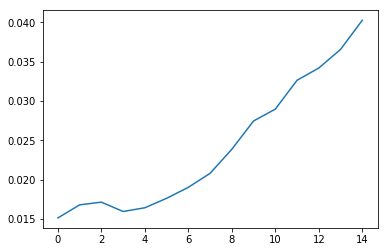

In [5]:
scores = []
for h in np.arange(0.06, 0.2, 0.01):
    R = RadiusNeighborsRegressor(radius=h)
    scores.append(cross_val_score(R, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=50))
scores = np.array(scores)

np.mean(scores, axis=1)

plt.plot(-np.mean(scores, axis=1))